## Exploring and pre-processing data: STEMI data

General process:
- Loading clinical data (separately)
- Review % missing data
- Remove features when percentage of missing data >=90%
- Review continuos features to identify outliers
- Fix outliers
- Review categorical features to identify empty values

In [1]:
#Loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Pre-processing: demographic data

In [2]:
#Loading data(separately)
age = pd.read_csv("../data/stemi/age.csv")
demo = pd.read_csv("../data/stemi/demo.csv")

In [3]:
#Review age
age.describe()

,subject_id,hadm_id,age
count,1299.000000,1299.000000,1299.000000
mean,29164.093149,150124.822941,80.036559
std,26519.711992,28885.598218,57.402735
min,53.000000,100078.000000,27.550000
25%,9864.000000,125999.500000,57.260000
50%,21144.000000,149512.000000,67.060000
75%,32615.500000,176527.500000,78.625000
max,99983.000000,199993.000000,301.950000


(array([260., 814., 146.,   0.,   0.,   0.,   0.,   0.,   0.,  79.]),
 array([ 27.55,  54.99,  82.43, 109.87, 137.31, 164.75, 192.19, 219.63,
        247.07, 274.51, 301.95]),
 <a list of 10 Patch objects>)

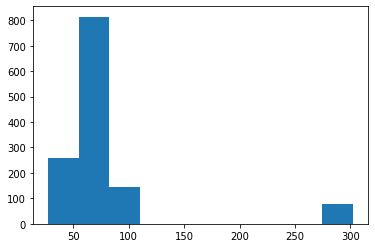

In [4]:
plt.hist(age.age)

In [5]:
#Fix outliers (age)
age['age']=np.where(age['age']>=300,age['age']*90/300,age['age'])
age.describe()

,subject_id,hadm_id,age
count,1299.000000,1299.000000,1299.000000
mean,29164.093149,150124.822941,67.264129
std,26519.711992,28885.598218,13.871077
min,53.000000,100078.000000,27.550000
25%,9864.000000,125999.500000,57.260000
50%,21144.000000,149512.000000,67.060000
75%,32615.500000,176527.500000,78.625000
max,99983.000000,199993.000000,90.585000


In [6]:
#Convert gender to one-hot-encoding
age["sex"] = np.where(age['gender']=="M",1,0)
age["sex"].value_counts()

1    839
0    460
Name: sex, dtype: int64

In [7]:
#Adding age + sex + label to demographic data
demo["Sex"] = age["sex"]
demo["Age"] = age["age"]
print("demo:",demo.shape)

demo: (1299, 14)


In [8]:
demo.describe()

,subject_id,hadm_id,icustay_id,los,adm_elective,adm_emergency,adm_urgent,status_divorced,status_married,status_single,status_widow,weight_admit,Sex,Age
count,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1141.000000,1299.000000,1299.000000
mean,29164.093149,150124.822941,249763.382602,4.398129,0.012317,0.899923,0.087760,0.052348,0.561201,0.166282,0.145497,81.176836,0.645881,67.264129
std,26519.711992,28885.598218,29154.947610,6.418085,0.110340,0.300218,0.283054,0.222814,0.496431,0.372477,0.352737,18.868214,0.478430,13.871077
min,53.000000,100078.000000,200007.000000,1.000200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39.500000,0.000000,27.550000
25%,9864.000000,125999.500000,224499.000000,1.545500,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68.000000,0.000000,57.260000
50%,21144.000000,149512.000000,249122.000000,2.369800,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,80.000000,1.000000,67.060000
75%,32615.500000,176527.500000,273867.000000,4.260950,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,92.699997,1.000000,78.625000
max,99983.000000,199993.000000,299941.000000,100.122500,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,177.300003,1.000000,90.585000


In [9]:
#Renaming names:
demo = demo.rename(columns={'los': 'Length of stay',
                           'weight_admit':'Weight at admission'})

In [10]:
demo.shape

(1299, 14)

### Preprocessing: complications data

In [11]:
comp = pd.read_csv("../data/stemi/complications.csv")
leads = pd.read_csv("../data/stemi/leads_depression.csv")

In [12]:
#Concatenate leads + complications set
leads_complications = pd.concat([leads, comp])

In [13]:
#Fix multiple rows for each patient
result = leads_complications.groupby(['subject_id','hadm_id','icustay_id'])
complications = result.sum().reset_index()

In [14]:
complications.describe()

,subject_id,hadm_id,icustay_id,i_lead,ii_lead,iii_lead,v1_lead,v2_lead,v3_lead,v4_lead,...,pericarditis,renal_failure,angina,cerebrovascular_accident,cardiac_arrest,congestive_heart_failure,chronic_airway_obstruction,aneurysm,diabetes,lbbb_flag
count,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,...,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000
mean,29164.093149,150124.822941,249763.382602,0.056967,0.026944,0.024634,0.028483,0.052348,0.039261,0.036952,...,0.004619,0.122402,0.011547,0.023865,0.070824,0.364126,0.059276,0.004619,0.224788,0.150885
std,26519.711992,28885.598218,29154.947610,0.231869,0.161982,0.155068,0.166414,0.222814,0.194290,0.188715,...,0.067832,0.327876,0.106877,0.152686,0.256629,0.481370,0.236232,0.067832,0.417604,0.784296
min,53.000000,100078.000000,200007.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9864.000000,125999.500000,224499.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,21144.000000,149512.000000,249122.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32615.500000,176527.500000,273867.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,99983.000000,199993.000000,299941.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [15]:
complications.columns

Index(['subject_id', 'hadm_id', 'icustay_id', 'i_lead', 'ii_lead', 'iii_lead',
       'v1_lead', 'v2_lead', 'v3_lead', 'v4_lead', 'v5_lead', 'v6_lead',
       'avf_lead', 'avr_lead', 'avl_lead', 'f', 'v1r', 'v2r', 't_wave',
       'qtc_wave', 'av_block', 'rbbb_flag', 'atrial_fibrillation',
       'ventricular_fibrillation', 'ventricular_tachycardia',
       'cardiogenic_shock', 'pulmonary_edema', 'mitral_regurgitation',
       'septal_rupture', 'free_wall_rupture', 'pericarditis', 'renal_failure',
       'angina', 'cerebrovascular_accident', 'cardiac_arrest',
       'congestive_heart_failure', 'chronic_airway_obstruction', 'aneurysm',
       'diabetes', 'lbbb_flag'],
      dtype='object')

In [16]:
#One-hot encoding to all variables
complications['avr_lead']=np.where(complications['avr_lead']>=1,1,0)
complications['avl_lead']=np.where(complications['avl_lead']>=1,1,0)
complications['f']=np.where(complications['f']>=1,1,0)
complications['v1r']=np.where(complications['v1r']>=1,1,0)
complications['v2r']=np.where(complications['v2r']>=1,1,0)
complications['t_wave']=np.where(complications['t_wave']>=1,1,0)
complications['qtc_wave']=np.where(complications['qtc_wave']>=1,1,0)
complications['pulmonary_edema']=np.where(complications['qtc_wave']>=1,1,0)
complications['free_wall_rupture']=np.where(complications['qtc_wave']>=1,1,0)
complications['aneurysm']=np.where(complications['aneurysm']>=1,1,0)
complications['rbbb_flag']=np.where(complications['rbbb_flag']>=1,1,0)
complications['diabetes']=np.where(complications['diabetes']>=1,1,0)
complications['chronic_airway_obstruction']=np.where(complications['chronic_airway_obstruction']>=1,1,0)
complications['congestive_heart_failure']=np.where(complications['congestive_heart_failure']>=1,1,0)
complications['cardiac_arrest']=np.where(complications['cardiac_arrest']>=1,1,0)
complications['cerebrovascular_accident']=np.where(complications['cerebrovascular_accident']>=1,1,0)
complications['angina']=np.where(complications['angina']>=1,1,0)
complications['renal_failure']=np.where(complications['renal_failure']>=1,1,0)
complications['pericarditis']=np.where(complications['pericarditis']>=1,1,0)
complications['septal_rupture']=np.where(complications['septal_rupture']>=1,1,0)
complications['mitral_regurgitation']=np.where(complications['mitral_regurgitation']>=1,1,0)
complications['cardiogenic_shock']=np.where(complications['cardiogenic_shock']>=1,1,0)
complications['ventricular_tachycardia']=np.where(complications['ventricular_tachycardia']>=1,1,0)
complications['ventricular_fibrillation']=np.where(complications['ventricular_fibrillation']>=1,1,0)
complications['atrial_fibrillation']=np.where(complications['atrial_fibrillation']>=1,1,0)
complications['av_block']=np.where(complications['av_block']>=1,1,0)
complications['i_lead']=np.where(complications['i_lead']>=1,1,0)
complications['ii_lead']=np.where(complications['ii_lead']>=1,1,0)
complications['iii_lead']=np.where(complications['iii_lead']>=1,1,0)
complications['v1_lead']=np.where(complications['v1_lead']>=1,1,0)
complications['lbbb_flag']=np.where(complications['lbbb_flag']>=1,1,0)
complications['v2_lead']=np.where(complications['v2_lead']>=1,1,0)
complications['v4_lead']=np.where(complications['v4_lead']>=1,1,0)
complications['v5_lead']=np.where(complications['v5_lead']>=1,1,0)
complications['v6_lead']=np.where(complications['v6_lead']>=1,1,0)
complications['avf_lead']=np.where(complications['avf_lead']>=1,1,0)
complications['v3_lead']=np.where(complications['v3_lead']>=1,1,0)

In [17]:
complications.describe()

,subject_id,hadm_id,icustay_id,i_lead,ii_lead,iii_lead,v1_lead,v2_lead,v3_lead,v4_lead,...,pericarditis,renal_failure,angina,cerebrovascular_accident,cardiac_arrest,congestive_heart_failure,chronic_airway_obstruction,aneurysm,diabetes,lbbb_flag
count,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,...,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000
mean,29164.093149,150124.822941,249763.382602,0.056967,0.026944,0.024634,0.028483,0.052348,0.039261,0.036952,...,0.004619,0.122402,0.011547,0.023865,0.070824,0.364126,0.059276,0.004619,0.224788,0.043880
std,26519.711992,28885.598218,29154.947610,0.231869,0.161982,0.155068,0.166414,0.222814,0.194290,0.188715,...,0.067832,0.327876,0.106877,0.152686,0.256629,0.481370,0.236232,0.067832,0.417604,0.204907
min,53.000000,100078.000000,200007.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9864.000000,125999.500000,224499.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,21144.000000,149512.000000,249122.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32615.500000,176527.500000,273867.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,99983.000000,199993.000000,299941.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
#Renaming names:
complications = complications.rename(columns={'cardiogenic_shock': 'Cardiogenic shock',
                                               'renal_failure':'Renal failure',
                                               'cardiac_arrest':'Cardiac arrest'})

### Preprocessing: procedures data

In [19]:
procedures = pd.read_csv("../data/stemi/procedures.csv")
endotrach_tube = pd.read_csv("../data/stemi/endotrach_tube.csv")
ventilation = pd.read_csv("../data/stemi/ventilation.csv")

In [20]:
#Concat procedures + endotrach_tube set
proc = pd.concat([procedures, endotrach_tube,ventilation])

In [21]:
#Fix multiple rows for each patient
result = proc.groupby(['subject_id','hadm_id','icustay_id'])
proc = result.sum().reset_index()

In [22]:
proc.describe()

,subject_id,hadm_id,icustay_id,coronary_arteriography,injection_or_infusion_of_platelet_inhibitor,combined_right_and_left_heart_cardiac_catheterization,replacement_of_tracheostomy_tube,insertion_of_non_drug_eluting_coronary_artery_stent,insertion_of_drug_eluting_coronary_artery_stent,angiocardiography_of_left_heart_structures,insertion_of_endotracheal_tube,extracorporeal_circulation_auxiliary_to_open_heart_surgery,implant_of_pulsation_balloon,venous_catheterization,bypass,angiocardiography_of_right_heart_structures,arterial_catheterization,insertion_of_temporary_transvenous_pacemaker_system,endotrachflag,vent
count,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000
mean,29164.093149,150124.822941,249763.382602,0.826790,0.497306,0.459584,0.347960,0.376443,0.266359,0.217090,0.139338,0.194765,0.217090,0.105466,0.335643,0.123941,0.050808,0.066205,0.200924,0.324095
std,26519.711992,28885.598218,29154.947610,0.426426,0.500185,0.498556,0.476507,0.484680,0.442224,0.412423,0.346432,0.396172,0.412423,0.307271,0.706376,0.329642,0.219691,0.248735,0.400845,0.468216
min,53.000000,100078.000000,200007.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9864.000000,125999.500000,224499.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,21144.000000,149512.000000,249122.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32615.500000,176527.500000,273867.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,99983.000000,199993.000000,299941.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Pre-processing: arterial blood gas data

In [24]:
blood_gas = pd.read_csv("../data/stemi/arterial_blood_gas.csv")
blood_gas.describe()

,subject_id,hadm_id,icustay_id,alveolar_arterial_gradient_avg,baseexcess_avg,bicarbonate_avg,totalco2_avg,chloride_avg,calcium_avg,lactate_avg,...,chloride_max,calcium_max,lactate_max,o2flow_max,fio2_max,so2_max,pco2_max,ph_max,po2_max,temperature_max
count,1299.000000,1299.000000,1299.000000,156.000000,613.000000,13.000000,613.000000,116.000000,390.000000,361.000000,...,116.000000,390.000000,361.000000,89.000000,281.000000,598.000000,613.000000,626.000000,613.000000,306.000000
mean,29164.093149,150124.822941,249763.382602,458.713675,-1.980194,23.807692,23.406004,106.498358,1.119910,2.684736,...,107.456897,1.196205,3.290443,15.747191,76.391459,92.642140,45.089723,7.422604,238.986949,37.082353
std,26519.711992,28885.598218,29154.947610,116.332214,3.375915,5.178234,3.667912,5.370621,0.080424,1.816452,...,5.852376,0.148386,2.538700,28.946573,26.402580,11.323285,10.009151,0.062480,133.432940,1.215049
min,53.000000,100078.000000,200007.000000,177.000000,-17.615385,17.000000,10.941176,92.000000,0.830000,0.433333,...,92.000000,0.830000,0.500000,2.000000,2.000000,44.000000,21.000000,7.120000,28.000000,32.300000
25%,9864.000000,125999.500000,224499.000000,388.750000,-4.000000,19.000000,21.214286,103.000000,1.070000,1.500000,...,104.000000,1.100000,1.600000,3.000000,50.000000,96.000000,39.000000,7.380000,121.000000,36.700000
50%,21144.000000,149512.000000,249122.000000,475.000000,-1.444444,24.000000,23.666667,106.550000,1.120000,2.150000,...,107.000000,1.180000,2.600000,4.000000,100.000000,98.000000,44.000000,7.430000,205.000000,37.200000
75%,32615.500000,176527.500000,273867.000000,548.375000,0.000000,27.500000,25.750000,109.666667,1.166250,3.200000,...,111.000000,1.260000,3.900000,10.000000,100.000000,98.000000,50.000000,7.460000,353.000000,37.800000
max,99983.000000,199993.000000,299941.000000,648.000000,7.600000,34.000000,41.200000,124.000000,1.550000,13.900000,...,125.000000,2.400000,14.800000,100.000000,100.000000,100.000000,103.000000,7.600000,596.000000,39.600000


In [25]:
blood_gas.columns

Index(['subject_id', 'hadm_id', 'icustay_id', 'alveolar_arterial_gradient_avg',
       'baseexcess_avg', 'bicarbonate_avg', 'totalco2_avg', 'chloride_avg',
       'calcium_avg', 'lactate_avg', 'o2flow_avg', 'fio2_avg', 'so2_avg',
       'pco2_avg', 'ph_avg', 'po2_avg', 'temperature_avg',
       'alveolar_arterial_gradient_min', 'baseexcess_min', 'bicarbonate_min',
       'totalco2_min', 'chloride_min', 'calcium_min', 'lactate_min',
       'o2flow_min', 'fio2_min', 'so2_min', 'pco2_min', 'ph_min', 'po2_min',
       'temperature_min', 'alveolar_arterial_gradient_max', 'baseexcess_max',
       'bicarbonate_max', 'totalco2_max', 'chloride_max', 'calcium_max',
       'lactate_max', 'o2flow_max', 'fio2_max', 'so2_max', 'pco2_max',
       'ph_max', 'po2_max', 'temperature_max'],
      dtype='object')

(array([  1.,   0.,   0.,   1.,  10.,  15.,  42., 141.,  88.,   8.]),
 array([28.03333333, 29.19      , 30.34666667, 31.50333333, 32.66      ,
        33.81666667, 34.97333333, 36.13      , 37.28666667, 38.44333333,
        39.6       ]),
 <a list of 10 Patch objects>)

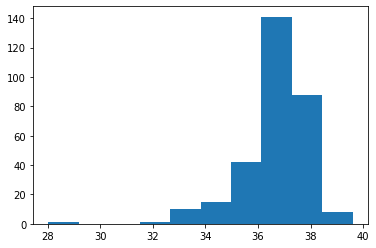

In [26]:
plt.hist(blood_gas.temperature_avg)

In [27]:
#Fix features values
blood_gas['baseexcess_avg']=np.where(blood_gas['baseexcess_avg']<0,0,blood_gas['baseexcess_avg'])

(array([512.,  41.,  23.,  14.,   7.,   8.,   4.,   2.,   0.,   2.]),
 array([0.  , 0.76, 1.52, 2.28, 3.04, 3.8 , 4.56, 5.32, 6.08, 6.84, 7.6 ]),
 <a list of 10 Patch objects>)

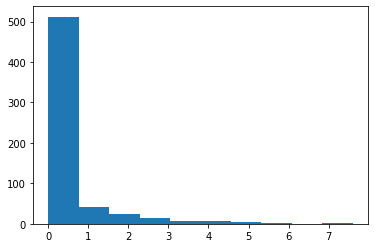

In [28]:
plt.hist(blood_gas.baseexcess_avg)

In [29]:
blood_gas.describe()

,subject_id,hadm_id,icustay_id,alveolar_arterial_gradient_avg,baseexcess_avg,bicarbonate_avg,totalco2_avg,chloride_avg,calcium_avg,lactate_avg,...,chloride_max,calcium_max,lactate_max,o2flow_max,fio2_max,so2_max,pco2_max,ph_max,po2_max,temperature_max
count,1299.000000,1299.000000,1299.000000,156.000000,613.000000,13.000000,613.000000,116.000000,390.000000,361.000000,...,116.000000,390.000000,361.000000,89.000000,281.000000,598.000000,613.000000,626.000000,613.000000,306.000000
mean,29164.093149,150124.822941,249763.382602,458.713675,0.410128,23.807692,23.406004,106.498358,1.119910,2.684736,...,107.456897,1.196205,3.290443,15.747191,76.391459,92.642140,45.089723,7.422604,238.986949,37.082353
std,26519.711992,28885.598218,29154.947610,116.332214,1.019015,5.178234,3.667912,5.370621,0.080424,1.816452,...,5.852376,0.148386,2.538700,28.946573,26.402580,11.323285,10.009151,0.062480,133.432940,1.215049
min,53.000000,100078.000000,200007.000000,177.000000,0.000000,17.000000,10.941176,92.000000,0.830000,0.433333,...,92.000000,0.830000,0.500000,2.000000,2.000000,44.000000,21.000000,7.120000,28.000000,32.300000
25%,9864.000000,125999.500000,224499.000000,388.750000,0.000000,19.000000,21.214286,103.000000,1.070000,1.500000,...,104.000000,1.100000,1.600000,3.000000,50.000000,96.000000,39.000000,7.380000,121.000000,36.700000
50%,21144.000000,149512.000000,249122.000000,475.000000,0.000000,24.000000,23.666667,106.550000,1.120000,2.150000,...,107.000000,1.180000,2.600000,4.000000,100.000000,98.000000,44.000000,7.430000,205.000000,37.200000
75%,32615.500000,176527.500000,273867.000000,548.375000,0.000000,27.500000,25.750000,109.666667,1.166250,3.200000,...,111.000000,1.260000,3.900000,10.000000,100.000000,98.000000,50.000000,7.460000,353.000000,37.800000
max,99983.000000,199993.000000,299941.000000,648.000000,7.600000,34.000000,41.200000,124.000000,1.550000,13.900000,...,125.000000,2.400000,14.800000,100.000000,100.000000,100.000000,103.000000,7.600000,596.000000,39.600000


In [30]:
#Renaming names:
blood_gas = blood_gas.rename(columns={'baseexcess_avg': 'Avg. base excess',
                                      'baseexcess_min': 'Min. base excess',
                                     'bicarbonate_avg': 'Avg. bicarbonate',
                                     'totalco2_avg': 'Avg. total co2',
                                     'chloride_avg': 'Avg. chloride',
                                     'calcium_avg': 'Avg. calcium',
                                     'lactate_avg': 'Avg. lactate',
                                     'lactate_min': 'Min. lactate',
                                     'lactate_max': 'Max. lactate',
                                     'o2flow_avg': 'Avg. O2 flow',
                                     'fio2_avg': 'Avg. FiO2',
                                     'so2_avg': 'Avg. SO2',
                                     'pco2_avg': 'Avg. PCO2',
                                     'pco2_max': 'Max. PCO2',
                                     'ph_avg': 'Avg. pH',
                                     'ph_min': 'Min. pH',
                                     'po2_avg': 'Avg. pO2',
                                     'temperature_avg': 'Avg. temperature'})

### Pre-processing: laboratory data

In [31]:
lab = pd.read_csv("../data/stemi/laboratory.csv")

(array([837., 176.,  19.,   3.,   2.,   1.,   0.,   1.,   0.,   1.]),
 array([1.0000e+00, 3.3290e+02, 6.6480e+02, 9.9670e+02, 1.3286e+03,
        1.6605e+03, 1.9924e+03, 2.3243e+03, 2.6562e+03, 2.9881e+03,
        3.3200e+03]),
 <a list of 10 Patch objects>)

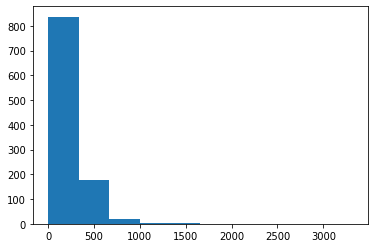

In [32]:
plt.hist(lab.creatine_kinase_mb_max)

In [33]:
#Fix features values
lab['creatine_kinase_ck_avg']=np.where(lab['creatine_kinase_ck_avg']>=200,lab['creatine_kinase_ck_avg']/1000,lab['creatine_kinase_ck_avg'])
lab['creatine_kinase_ck_min']=np.where(lab['creatine_kinase_ck_min']>=200,lab['creatine_kinase_ck_min']/1000,lab['creatine_kinase_ck_min'])
lab['creatine_kinase_ck_max']=np.where(lab['creatine_kinase_ck_max']>=200,lab['creatine_kinase_ck_max']/1000,lab['creatine_kinase_ck_max'])

lab['creatine_kinase_mb_avg']=np.where(lab['creatine_kinase_mb_avg']>=200,lab['creatine_kinase_mb_avg']/1000,lab['creatine_kinase_mb_avg'])
lab['creatine_kinase_mb_min']=np.where(lab['creatine_kinase_mb_min']>=200,lab['creatine_kinase_mb_min']/1000,lab['creatine_kinase_mb_min'])
lab['creatine_kinase_mb_max']=np.where(lab['creatine_kinase_mb_max']>=200,lab['creatine_kinase_mb_max']/1000,lab['creatine_kinase_mb_max'])

(array([541.,  89.,  78.,  64.,  61.,  50.,  41.,  53.,  31.,  32.]),
 array([  0.2 ,  20.08,  39.96,  59.84,  79.72,  99.6 , 119.48, 139.36,
        159.24, 179.12, 199.  ]),
 <a list of 10 Patch objects>)

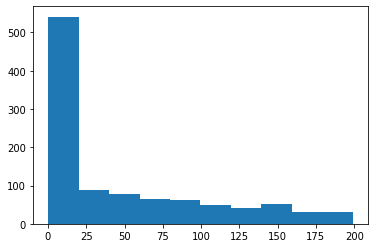

In [34]:
plt.hist(lab.creatine_kinase_mb_max)

In [35]:
lab.describe()

,subject_id,hadm_id,icustay_id,anion_gap_avg,albumin_avg,bands_avg,creatinine_avg,protein_creatinine_ratio_avg,fibrinogen_avg,uric_acid_avg,...,urea_max,white_blood_cells_max,hematocrit_max,hemoblobin_max,troponin_i_max,troponin_t_max,glucose_max,creactive_max,creatine_kinase_ck_max,creatine_kinase_mb_max
count,1299.000000,1299.000000,1299.000000,1223.000000,334.000000,121.000000,1262.000000,9.000000,113.000000,17.000000,...,1259.000000,1243.000000,390.000000,390.000000,48.000000,663.000000,341.000000,3.000000,1082.000000,1040.000000
mean,29164.093149,150124.822941,249763.382602,14.053103,3.381886,2.669421,3.230923,6.188889,264.488791,5.520588,...,23.240667,13.294473,35.856410,11.927179,25.731250,5.683356,207.334311,4.070000,13.667628,46.108727
std,26519.711992,28885.598218,29154.947610,3.000803,0.548884,5.328209,11.107515,14.245652,148.093470,2.190823,...,15.537842,5.233758,6.199336,2.065976,15.714882,5.826924,92.224564,2.801553,37.165079,56.917448
min,53.000000,100078.000000,200007.000000,6.000000,1.700000,0.000000,0.300000,0.600000,93.000000,2.600000,...,4.000000,2.100000,19.000000,6.400000,0.900000,0.010000,75.000000,2.300000,0.200000,0.200000
25%,9864.000000,125999.500000,224499.000000,12.000000,3.100000,0.000000,0.766667,0.700000,171.500000,3.900000,...,14.000000,9.800000,32.000000,10.500000,11.850000,1.460000,153.000000,2.455000,0.801500,0.392000
50%,21144.000000,149512.000000,249122.000000,14.000000,3.400000,0.000000,0.900000,0.800000,207.800000,4.800000,...,19.000000,12.300000,36.000000,11.900000,26.350000,3.530000,182.000000,2.610000,1.757000,17.000000
75%,32615.500000,176527.500000,273867.000000,15.500000,3.700000,4.000000,1.250000,2.400000,298.666667,6.900000,...,26.500000,15.700000,40.000000,13.275000,41.700000,8.140000,233.000000,4.955000,4.272250,83.000000
max,99983.000000,199993.000000,299941.000000,36.333333,4.900000,31.000000,159.666667,44.000000,835.000000,10.600000,...,167.000000,53.800000,58.000000,19.200000,49.600000,29.910000,686.000000,7.300000,196.000000,199.000000


In [36]:
lab.columns

Index(['subject_id', 'hadm_id', 'icustay_id', 'anion_gap_avg', 'albumin_avg',
       'bands_avg', 'creatinine_avg', 'protein_creatinine_ratio_avg',
       'fibrinogen_avg', 'uric_acid_avg',
       ...
       'urea_max', 'white_blood_cells_max', 'hematocrit_max', 'hemoblobin_max',
       'troponin_i_max', 'troponin_t_max', 'glucose_max', 'creactive_max',
       'creatine_kinase_ck_max', 'creatine_kinase_mb_max'],
      dtype='object', length=108)

In [37]:
#Renaming names:
lab = lab.rename(columns={'anion_gap_avg': 'Avg. anion gap',
                          'anion_gap_max': 'Max. anion gap',
                          'anion_gap_min': 'Min. anion gap',
                           'albumin_avg':'Avg. albumin',
                           'bands_avg':'Avg. bands',
                           'creatinine_min':'Min. creatinine',
                           'creatinine_avg':'Avg. creatinine',
                           'creatinine_max':'Max. creatinine',
                           'protein_creatinine_ratio_avg':'Avg. protein creatinine ratio',
                           'fibrinogen_avg':'Avg. fibrinogen',
                           'uric_acid_avg':'Avg. uric acid',
                           'triglycerides_avg':'Avg. triglycerides',
                           'tidal_volume_avg':'Avg. tidal volume',
                           'positive_end_expiratory_pressure_avg':'Avg. peep',
                           'positive_end_expiratory_pressure_min':'Min. peep',
                           'Eosinophils_avg':'Avg. eosinophils',
                           'neutrophils_avg':'Avg. neutrophils',
                           'lymphocytes_avg':'Avg. lymphocytes',
                           'basophils_avg':'Avg. basophils',
                           'monocytes':'Avg. monocytes',
                           'cholesterol_total_avg':'Avg. cholesterol total',
                           'cholesterol_hdl_avg':'Avg. cholesterol hdl',
                           'cholesterol_ldl_measured_avg':'Avg. cholesterol ldl measured',
                           'hemoglobin_a1c':'Avg. hemoglobin a1c',
                           'platelet_avg':'Avg. platelet',
                           'platelet_max':'Max. platelet',
                           'potassium_avg':'Avg. potassium',
                           'partial_thromboplastin_time_avg':'Avg. partial thromboplastin time',
                           'partial_thromboplastin_time_min':'Min. partial thromboplastin time',
                           'partial_thromboplastin_time_max':'Max. partial thromboplastin time',
                           'international_normalized_ratio_avg':'Avg. international_normalized_ratio',
                           'prothrombin_time_avg':'Avg. prothrombin time',
                           'sodium_avg':'Avg. sodium',
                           'sodium_min':'Min. sodium',
                           'sodium_max':'Max. sodium',
                           'urea_avg':'Avg. urea',
                           'urea_min':'Min. urea',
                           'urea_max':'Max. urea',
                           'white_blood_cells_avg':'Avg. white blood cells',
                           'white_blood_cells_min':'Min. white blood cells',
                           'hematocrit_avg':'Avg. hematocrit',
                           'hemoglobin_avg':'Avg. hemoglobin',
                           'troponin_i_avg':'Avg. troponin I',
                           'troponin_t_avg':'Avg. troponin T',
                           'glucose_avg':'Avg. glucose',
                           'creactive_avg':'Avg. creactive',
                           'creatine_kinase_ck_avg':'Avg. creatine kinase ck',
                           'creatine_kinase_ck_min':'Min. creatine kinase ck',
                           'creatine_kinase_ck_max':'Max. creatine kinase ck',
                           'creatine_kinase_mb_avg':'Avg. creatine kinase mb',})

### Vital signs

In [39]:
vital = pd.read_csv("../data/stemi/vital_sign.csv")
vital.describe()

,subject_id,hadm_id,icustay_id,heartrate_min,heartrate_max,heartrate_avg,sysbp_min,sysbp_max,sysbp_avg,diasbp_min,...,diasbp_avg,meanbp_min,meanbp_max,meanbp_avg,resprate_min,resprate_max,resprate_avg,spo2_min,spo2_max,spo2_avg
count,1299.000000,1299.000000,1299.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,...,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1.273000e+03,1273.000000,1273.000000,1273.000000,1273.000000
mean,29164.093149,150124.822941,249763.382602,60.664572,109.461901,81.474148,73.351925,161.979576,113.398913,35.057345,...,60.260647,50.348783,123.333065,77.319242,9.371249,1.882668e+03,31.607391,86.807541,107.310291,97.030377
std,26519.711992,28885.598218,29154.947610,16.194178,25.639224,12.845582,29.915977,323.173675,13.546498,15.486320,...,8.917850,17.222545,184.818323,8.772343,4.794940,6.601964e+04,449.158103,15.061871,271.738444,4.503898
min,53.000000,100078.000000,200007.000000,0.000000,55.000000,36.840000,0.000000,45.000000,25.000000,0.000000,...,12.428571,-39.000000,31.000000,17.428571,0.000000,1.800000e+01,9.000000,0.000000,71.000000,49.000000
25%,9864.000000,125999.500000,224499.000000,55.000000,92.000000,72.513514,69.000000,135.000000,103.969697,28.000000,...,54.124224,45.666698,97.666702,71.290126,8.000000,2.500000e+01,17.053763,87.000000,100.000000,96.209091
50%,21144.000000,149512.000000,249122.000000,61.000000,104.000000,80.846154,82.000000,149.000000,112.347826,38.000000,...,59.676923,53.666698,107.667000,76.597143,10.000000,2.800000e+01,18.673913,92.000000,100.000000,97.115385
75%,32615.500000,176527.500000,273867.000000,70.000000,123.000000,89.181818,91.000000,167.000000,121.284672,45.000000,...,65.800000,60.000000,122.000000,82.187496,13.000000,3.400000e+01,20.772093,94.000000,100.000000,98.000000
max,99983.000000,199993.000000,299941.000000,117.000000,300.000000,132.661290,136.000000,11647.000000,167.324324,76.000000,...,95.569697,89.000000,6559.000000,139.009709,21.000000,2.355555e+06,16044.265306,100.000000,9795.000000,238.602941


(array([1.00e+00, 1.00e+00, 1.27e+03, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00]),
 array([ 49.        ,  67.96029412,  86.92058824, 105.88088235,
        124.84117647, 143.80147059, 162.76176471, 181.72205882,
        200.68235294, 219.64264706, 238.60294118]),
 <a list of 10 Patch objects>)

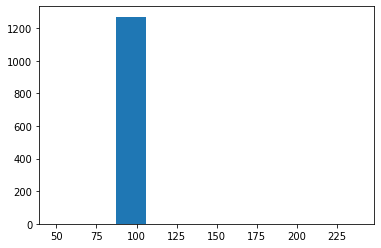

In [40]:
plt.hist(vital.spo2_avg)

In [41]:
#Fix features values
vital['resprate_avg']=np.where(vital['resprate_avg']>=100,vital['resprate_avg']/100,vital['resprate_avg'])
vital['resprate_max']=np.where(vital['resprate_max']>=100,vital['resprate_max']/500,vital['resprate_max'])
vital['resprate_max']=np.where(vital['resprate_max']>=1000,vital['resprate_max']/100,vital['resprate_max'])
vital['meanbp_max']=np.where(vital['meanbp_max']>=200,vital['meanbp_max']/1000,vital['meanbp_max'])
vital['meanbp_avg']=np.where(vital['meanbp_avg']>=200,vital['meanbp_avg']/1000,vital['meanbp_avg'])
vital['meanbp_min']=np.where(vital['meanbp_min']<0,0,vital['meanbp_min'])
vital['diasbp_max']=np.where(vital['diasbp_max']>=200,vital['diasbp_max']/1000,vital['diasbp_max'])
vital['sysbp_max']=np.where(vital['sysbp_max']>=200,vital['sysbp_max']/1000,vital['sysbp_max'])
vital['sysbp_avg']=np.where(vital['sysbp_avg']>=200,vital['sysbp_avg']/1000,vital['sysbp_avg'])
vital['spo2_avg']=np.where(vital['spo2_avg']>=200,vital['spo2_avg']/1000,vital['spo2_avg'])
vital['spo2_max']=np.where(vital['spo2_max']>=200,vital['spo2_max']/1000,vital['spo2_max'])
vital['heartrate_avg']=np.where(vital['heartrate_avg']>=200,vital['heartrate_avg']/1000,vital['heartrate_avg'])
vital['spo2_avg']=np.where(vital['spo2_avg']>200,vital['spo2_avg']/1000,vital['spo2_avg'])

(array([  4.,   1.,   9., 247., 665., 252.,  60.,  24.,   5.,   6.]),
 array([  0.22 ,  19.598,  38.976,  58.354,  77.732,  97.11 , 116.488,
        135.866, 155.244, 174.622, 194.   ]),
 <a list of 10 Patch objects>)

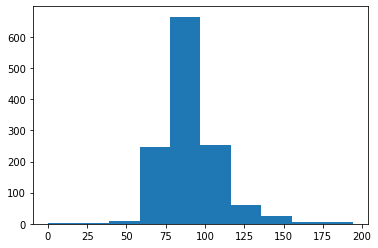

In [42]:
plt.hist(vital.diasbp_max)

In [43]:
vital.describe()

,subject_id,hadm_id,icustay_id,heartrate_min,heartrate_max,heartrate_avg,sysbp_min,sysbp_max,sysbp_avg,diasbp_min,...,diasbp_avg,meanbp_min,meanbp_max,meanbp_avg,resprate_min,resprate_max,resprate_avg,spo2_min,spo2_max,spo2_avg
count,1299.000000,1299.000000,1299.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,...,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000
mean,29164.093149,150124.822941,249763.382602,60.664572,109.461901,81.474148,73.351925,140.598778,113.398913,35.057345,...,60.260647,50.528673,105.349496,77.319242,9.371249,30.962720,19.129918,86.807541,99.623562,96.843130
std,26519.711992,28885.598218,29154.947610,16.194178,25.639224,12.845582,29.915977,39.935965,13.546498,15.486320,...,8.917850,16.565851,32.118101,8.772343,4.794940,10.551988,4.880092,15.061871,2.762557,3.443601
min,53.000000,100078.000000,200007.000000,0.000000,55.000000,36.840000,0.000000,0.200000,25.000000,0.000000,...,12.428571,0.000000,0.201000,17.428571,0.000000,0.200000,9.000000,0.000000,9.795000,0.238603
25%,9864.000000,125999.500000,224499.000000,55.000000,92.000000,72.513514,69.000000,132.000000,103.969697,28.000000,...,54.124224,45.666698,95.000000,71.290126,8.000000,25.000000,17.053763,87.000000,100.000000,96.206349
50%,21144.000000,149512.000000,249122.000000,61.000000,104.000000,80.846154,82.000000,146.000000,112.347826,38.000000,...,59.676923,53.666698,105.333000,76.597143,10.000000,28.000000,18.673913,92.000000,100.000000,97.115385
75%,32615.500000,176527.500000,273867.000000,70.000000,123.000000,89.181818,91.000000,161.000000,121.284672,45.000000,...,65.800000,60.000000,118.000000,82.187496,13.000000,33.000000,20.772093,94.000000,100.000000,98.000000
max,99983.000000,199993.000000,299941.000000,117.000000,300.000000,132.661290,136.000000,199.000000,167.324324,76.000000,...,95.569697,89.000000,199.000000,139.009709,21.000000,99.000000,160.442653,100.000000,110.000000,100.000000


In [45]:
#Renaming names:
vital = vital.rename(columns={
                              'heartrate_min': 'Min. heart rate',
                              'heartrate_max': 'Max. heart rate',
                              'heartrate_avg': 'Avg. heart rate',
                              'sysbp_min': 'Min. systolic blood pressure',
                              'sysbp_max': 'Max. systolic blood pressure',
                              'sysbp_avg': 'Avg. systolic blood pressure',
                              'diasbp_min': 'Min. diastolic blood pressure',
                              'diasbp_max': 'Max. diastolic blood pressure',
                              'diasbp_avg': 'Avg. diastolic blood pressure',
                              'meanbp_min': 'Min. mean blood pressure',
                              'meanbp_max': 'Max. mean blood pressure',
                              'meanbp_avg': 'Avg. mean blood pressure',
                              'resprate_min': 'Min. respiratory rate',
                              'resprate_max': 'Max. respiratory rate',
                              'resprate_avg': 'Avg. respiratory rate',
                              'spo2_min': 'Min. SpO2',
                              'spo2_max': 'Max. SpO2',
                              'spo2_avg': 'Avg. SpO2',
                              'pco2_min': 'Min. PCO2',
                              'po2_min': 'Min. PO2'})

### Pre-processing: treatments data

In [47]:
treats = pd.read_csv("../data/stemi/treatments.csv")

In [48]:
#Fix multiple rows for each patient
result = treats.groupby(['subject_id','hadm_id','icustay_id'])
treats = result.sum().reset_index()

In [49]:
#One-hot encoding to all variables
treats['oral_glucose_low_drugs']=np.where(treats['oral_glucose_low_drugs']>=1,1,0)
treats['fibrates']=np.where(treats['fibrates']>=1,1,0)
treats['beta_blockers']=np.where(treats['beta_blockers']>=1,1,0)
treats['arb']=np.where(treats['arb']>=1,1,0)
treats['digoxin']=np.where(treats['digoxin']>=1,1,0)
treats['enoxaparin']=np.where(treats['enoxaparin']>=1,1,0)
treats['calcium_antagonist']=np.where(treats['calcium_antagonist']>=1,1,0)
treats['dobutamine']=np.where(treats['dobutamine']>=1,1,0)
treats['insulin']=np.where(treats['insulin']>=1,1,0)
treats['dopamine']=np.where(treats['dopamine']>=1,1,0)
treats['warfarin']=np.where(treats['warfarin']>=1,1,0)
treats['vancomycin']=np.where(treats['vancomycin']>=1,1,0)
treats['clopidogrel_bisulfate']=np.where(treats['clopidogrel_bisulfate']>=1,1,0)
treats['oral_nitrates']=np.where(treats['oral_nitrates']>=1,1,0)
treats['amiodarone']=np.where(treats['amiodarone']>=1,1,0)
treats['statins']=np.where(treats['statins']>=1,1,0)
treats['aspirin']=np.where(treats['aspirin']>=1,1,0)
treats['heparin']=np.where(treats['heparin']>=1,1,0)
treats['ace_inhibitors']=np.where(treats['ace_inhibitors']>=1,1,0)
treats['diuretics']=np.where(treats['diuretics']>=1,1,0)
treats['potassium_chloride']=np.where(treats['potassium_chloride']>=1,1,0)

In [50]:
treats.describe()

,subject_id,hadm_id,icustay_id,aspirin,clopidogrel_bisulfate,enoxaparin,heparin,oral_nitrates,statins,fibrates,...,calcium_antagonist,amiodarone,digoxin,dobutamine,dopamine,oral_glucose_low_drugs,insulin,potassium_chloride,warfarin,vancomycin
count,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,...,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000
mean,29164.093149,150124.822941,249763.382602,0.172440,0.117013,0.011547,0.195535,0.104696,0.177829,0.004619,...,0.012317,0.071594,0.005389,0.024634,0.046959,0.003849,0.026174,0.372594,0.072363,0.087760
std,26519.711992,28885.598218,29154.947610,0.377908,0.321560,0.106877,0.396765,0.306279,0.382516,0.067832,...,0.110340,0.257913,0.073238,0.155068,0.211633,0.061946,0.159714,0.483682,0.259188,0.283054
min,53.000000,100078.000000,200007.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9864.000000,125999.500000,224499.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,21144.000000,149512.000000,249122.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32615.500000,176527.500000,273867.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,99983.000000,199993.000000,299941.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
treats = treats.rename(columns={'ace_inhibitors':'Ace inhibitors'})

### Pre-processing: Hemodynamic data

In [52]:
hemo = pd.read_csv("../data/stemi/hemodynamic.csv")
hemo.describe()

,subject_id,hadm_id,icustay_id,cardiac_out_min,cardiac_out_max,intra_craneal_pressure_min,intra_craneal_pressure_max,pap_systolic_min,pap_systolic_max,pap_diastolic_min,...,pcwp_min,pcwp_max,svo2_min,svo2_max,pa_line_min,pa_line_max,vad_beat_rate_r_min,vad_beat_rate_r_max,vad_beat_rate_l_min,vad_beat_rate_l_max
count,1299.000000,1299.000000,1299.000000,17.000000,17.000000,2.000000,2.000000,489.000000,489.000000,489.000000,...,71.000000,75.000000,26.000000,26.000000,104.000000,104.000000,2.000000,2.000000,3.000000,3.000000
mean,29164.093149,150124.822941,249763.382602,3.647059,6.558824,5.500000,24.000000,26.535787,46.893661,12.408998,...,16.408451,19.093333,59.461538,74.807692,51.067308,52.105769,38.000000,45.000000,51.333333,57.000000
std,26519.711992,28885.598218,29154.947610,1.016192,3.414685,6.363961,5.656854,9.832785,12.802765,5.703429,...,5.765854,6.309952,12.637186,8.813713,7.559813,7.228474,8.485281,4.242641,6.658328,11.789826
min,53.000000,100078.000000,200007.000000,2.200000,3.700000,1.000000,20.000000,0.000000,0.000000,0.000000,...,5.000000,7.000000,26.000000,61.000000,35.000000,40.000000,32.000000,42.000000,44.000000,44.000000
25%,9864.000000,125999.500000,224499.000000,3.300000,4.900000,3.250000,22.000000,21.000000,38.000000,9.000000,...,13.000000,14.500000,51.750000,67.250000,47.750000,48.000000,35.000000,43.500000,48.500000,52.000000
50%,21144.000000,149512.000000,249122.000000,3.400000,5.300000,5.500000,24.000000,26.000000,45.000000,12.000000,...,16.000000,19.000000,62.500000,75.000000,50.000000,50.000000,38.000000,45.000000,53.000000,60.000000
75%,32615.500000,176527.500000,273867.000000,3.800000,6.400000,7.750000,26.000000,32.000000,53.000000,16.000000,...,19.000000,23.000000,65.750000,81.250000,52.000000,55.000000,41.000000,46.500000,55.000000,63.500000
max,99983.000000,199993.000000,299941.000000,6.500000,17.400000,10.000000,28.000000,65.000000,107.000000,31.000000,...,35.000000,35.000000,91.000000,96.000000,77.000000,77.000000,44.000000,48.000000,57.000000,67.000000


(array([1., 0., 0., 0., 0., 0., 1., 0., 0., 1.]),
 array([44. , 46.3, 48.6, 50.9, 53.2, 55.5, 57.8, 60.1, 62.4, 64.7, 67. ]),
 <a list of 10 Patch objects>)

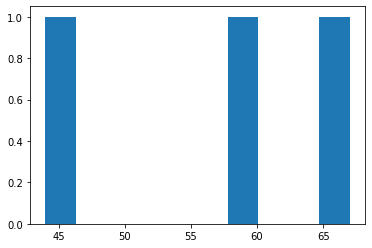

In [53]:
#Checking outliers
plt.hist(hemo.vad_beat_rate_l_max)

In [54]:
#removing columns with 90% missing values
hemo=hemo.drop(['ef_cco_min','ef_cco_max','lap_max',
                'lap_min','pa_line_min','pa_line_max'],axis=1)

In [55]:
#Fix features values
hemo['intra_craneal_pressure_min']=np.where(hemo['intra_craneal_pressure_min']<0,0,hemo['intra_craneal_pressure_min'])
hemo['pap_mean_min']=np.where(hemo['pap_mean_min']<0,0,hemo['pap_mean_min'])
hemo['pap_mean_max']=np.where(hemo['pap_mean_max']<0,0,hemo['pap_mean_max'])

hemo['cvp_min']=np.where(hemo['cvp_min']<0,0,hemo['cvp_min'])
hemo['cvp_max']=np.where(hemo['cvp_max']>0,hemo['cvp_max']/10000,hemo['cvp_max'])

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

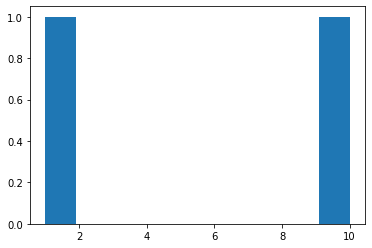

In [56]:
#Checking outliers
plt.hist(hemo.intra_craneal_pressure_min)

In [57]:
hemo.describe()

,subject_id,hadm_id,icustay_id,cardiac_out_min,cardiac_out_max,intra_craneal_pressure_min,intra_craneal_pressure_max,pap_systolic_min,pap_systolic_max,pap_diastolic_min,...,rvap_min,rvap_max,pcwp_min,pcwp_max,svo2_min,svo2_max,vad_beat_rate_r_min,vad_beat_rate_r_max,vad_beat_rate_l_min,vad_beat_rate_l_max
count,1299.000000,1299.000000,1299.000000,17.000000,17.000000,2.000000,2.000000,489.000000,489.000000,489.000000,...,2.000000,2.000000,71.000000,75.000000,26.000000,26.000000,2.000000,2.000000,3.000000,3.000000
mean,29164.093149,150124.822941,249763.382602,3.647059,6.558824,5.500000,24.000000,26.535787,46.893661,12.408998,...,2.950000,4.350000,16.408451,19.093333,59.461538,74.807692,38.000000,45.000000,51.333333,57.000000
std,26519.711992,28885.598218,29154.947610,1.016192,3.414685,6.363961,5.656854,9.832785,12.802765,5.703429,...,1.484924,0.353553,5.765854,6.309952,12.637186,8.813713,8.485281,4.242641,6.658328,11.789826
min,53.000000,100078.000000,200007.000000,2.200000,3.700000,1.000000,20.000000,0.000000,0.000000,0.000000,...,1.900000,4.100000,5.000000,7.000000,26.000000,61.000000,32.000000,42.000000,44.000000,44.000000
25%,9864.000000,125999.500000,224499.000000,3.300000,4.900000,3.250000,22.000000,21.000000,38.000000,9.000000,...,2.425000,4.225000,13.000000,14.500000,51.750000,67.250000,35.000000,43.500000,48.500000,52.000000
50%,21144.000000,149512.000000,249122.000000,3.400000,5.300000,5.500000,24.000000,26.000000,45.000000,12.000000,...,2.950000,4.350000,16.000000,19.000000,62.500000,75.000000,38.000000,45.000000,53.000000,60.000000
75%,32615.500000,176527.500000,273867.000000,3.800000,6.400000,7.750000,26.000000,32.000000,53.000000,16.000000,...,3.475000,4.475000,19.000000,23.000000,65.750000,81.250000,41.000000,46.500000,55.000000,63.500000
max,99983.000000,199993.000000,299941.000000,6.500000,17.400000,10.000000,28.000000,65.000000,107.000000,31.000000,...,4.000000,4.600000,35.000000,35.000000,91.000000,96.000000,44.000000,48.000000,57.000000,67.000000


In [58]:
#Renaming names:
hemo = hemo.rename(columns={'cardiac_out_min':'Min. cardiac out',
                             'cardiac_out_max':'Max. cardiac out',
                             'intra_craneal_pressure_min':'Min. intra craneal pressure',
                             'intra_craneal_pressure_max':'Max. intra craneal pressure',
                             'pap_systolic_min':'Min. pap systolic',
                             'pap_systolic_max':'Max. pap systolic',
                             'pap_diastolic_min':'Min. pap diastolic',
                             'pap_diastolic_max':'Max. pap diastolic',
                             'pap_mean_min':'Min. pap mean',
                             'pap_mean_max':'Max. pap mean',
                             'lap_min':'Min. lap',
                             'lap_max':'Max. lap',
                             'cvp_min':'Min. cvp',
                             'cvp_max':'Max. cvp',
                             'co_min':'Min. co',
                             'co_max':'Max. co',
                             'lvap_min':'Min. lvap',
                             'lvap_max':'Max. lvap',
                             'rvap_min':'Min. rvap',
                             'rvap_max':'Max. rvap',
                             'ef_cco_min':'Min. ef cco',
                             'ef_cco_max':'Max. ef cco',
                             'pcwp_min':'Min. pcwp',
                             'pcwp_max':'Max. pcwp',
                             'svo2_min':'Min. svo2',
                             'svo2_max':'Max. svo2',
                             'pa_line_min':'Min. pa line',
                             'pa_line_max':'Max. pa line',
                             'vad_beat_rate_r_min':'Min. vad beat rate r',
                             'vad_beat_rate_r_max':'Max. vad beat rate r',
                             'vad_beat_rate_l_min':'Min. vad beat rate l',
                             'vad_beat_rate_l_max':'Max. vad beat rate l',})

## Summary

In [59]:
print("Demographic data:",demo.shape)
print("Complications:",complications.shape)
print("Procedures:",proc.shape)
print("Arterial blood gas:",blood_gas.shape)
print("Laboratory results:",lab.shape)
print("Vital signs:",vital.shape)
print("Treatments:",treats.shape)
print("Hemodynamic:",hemo.shape)

Demographic data: (1299, 14)
Complications: (1299, 40)
Procedures: (1299, 16)
Arterial blood gas: (1299, 45)
Laboratory results: (1299, 106)
Vital signs: (1299, 16)
Treatments: (1299, 24)
Hemodynamic: (1299, 29)


## Sección: train_test_split
For each clinical set, we divided them in two datasets: train (80%) and test (20%)

In [60]:
from sklearn.model_selection import train_test_split

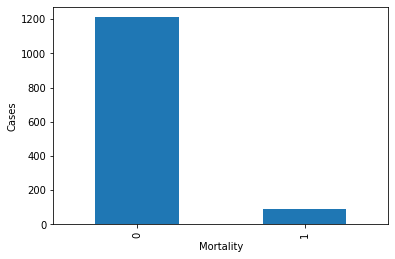

In [61]:
#Loading label data
label = pd.read_csv("../data/stemi/label.csv") #icustay_expire_flag
#Exploring icustay_expire_flag
cpdel = label.icustay_expire_flag.value_counts().plot(kind='bar')
plt.xlabel('Mortality')
plt.ylabel('Cases')
plt.show()

In [62]:
def split_data(data,label):
    "Function to split data in train and test sets"
    #columns = data.columns
    xtrain, xtest, ytrain, ytest = train_test_split(data, label, test_size=0.20, random_state=242)   
    return xtrain, xtest, ytrain, ytest

In [63]:
xtrain_demo, xtest_demo, ytrain_demo, ytest_demo = split_data(demo,label)
xtrain_comp, xtest_comp, ytrain_comp, ytest_comp = split_data(complications,label)
xtrain_proc, xtest_proc, ytrain_proc, ytest_proc = split_data(proc,label)
xtrain_blood_gas, xtest_blood_gas, ytrain_blood_gas, ytest_blood_gas = split_data(blood_gas,label)
xtrain_lab, xtest_lab, ytrain_lab, ytest_lab = split_data(lab,label)
xtrain_vital, xtest_vital, ytrain_vital, ytest_vital = split_data(vital,label)
xtrain_treats, xtest_treats, ytrain_treats, ytest_treats = split_data(treats,label)
xtrain_hemo, xtest_hemo, ytrain_hemo, ytest_hemo = split_data(hemo,label)

## Imputation

In [64]:
from sklearn.impute import SimpleImputer
def imputer(xtrain,xtest):
    "Function to impute by mean"
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean').fit(xtrain)
    xtrain = np.round(imputer.transform(xtrain),3)
    xtest = np.round(imputer.transform(xtest),3)
    return xtrain,xtest

In [65]:
xtrain_demo, xtest_demo = imputer(xtrain_demo, xtest_demo)
xtrain_comp, xtest_comp = imputer(xtrain_comp, xtest_comp)
xtrain_proc, xtest_proc = imputer(xtrain_proc, xtest_proc)
xtrain_blood_gas, xtest_blood_gas = imputer(xtrain_blood_gas, xtest_blood_gas)
xtrain_lab, xtest_lab = imputer(xtrain_lab, xtest_lab)
xtrain_vital, xtest_vital = imputer(xtrain_vital, xtest_vital)
xtrain_treats, xtest_treats = imputer(xtrain_treats, xtest_treats)
xtrain_hemo, xtest_hemo = imputer(xtrain_hemo, xtest_hemo)

In [66]:
def saving_data(data,xtrain,xtest,ytrain,ytest,filename,path):
    "Function to save datasets"
    columns = data.columns
    xtrain = pd.DataFrame(xtrain,columns=columns)
    xtest = pd.DataFrame(xtest,columns=columns)
    ytrain = pd.DataFrame(ytrain,columns=['icustay_expire_flag'])
    ytest = pd.DataFrame(ytest,columns=['icustay_expire_flag'])
    
    xtrain.to_csv(path+"xtrain_"+str(filename)+".csv")
    xtest.to_csv(path+"xtest_"+str(filename)+".csv")
    ytrain.to_csv(path+"ytrain_"+str(filename)+".csv")
    ytest.to_csv(path+"ytest_"+str(filename)+".csv")

In [67]:
saving_data(demo,xtrain_demo,xtest_demo,ytrain_demo,ytest_demo,"demo",'../data/stemi/')
saving_data(complications,xtrain_comp, xtest_comp, ytrain_comp, ytest_comp,"complications",'../data/stemi/')
saving_data(proc,xtrain_proc, xtest_proc, ytrain_proc, ytest_proc,"proc",'../data/stemi/')
saving_data(blood_gas,xtrain_blood_gas, xtest_blood_gas, ytrain_blood_gas, ytest_blood_gas,"blood_gas",'../data/stemi/')
saving_data(lab,xtrain_lab, xtest_lab, ytrain_lab, ytest_lab,"lab",'../data/stemi/')
saving_data(vital,xtrain_vital, xtest_vital, ytrain_vital, ytest_vital,"vital",'../data/stemi/')
saving_data(treats,xtrain_treats, xtest_treats, ytrain_treats, ytest_treats,"treats",'../data/stemi/')
saving_data(hemo,xtrain_hemo, xtest_hemo, ytrain_hemo, ytest_hemo,"hemo",'../data/stemi/')

### Creating "combined dataset"

In [68]:
#Concat demo + complications+procedures+blood_gas+lab+vital+treats+hemo
combined = pd.concat([demo,complications,proc,treats,blood_gas,lab,vital,hemo])
combined

,subject_id,hadm_id,icustay_id,Length of stay,adm_elective,adm_emergency,adm_urgent,status_divorced,status_married,status_single,...,Min. rvap,Max. rvap,Min. pcwp,Max. pcwp,Min. svo2,Max. svo2,Min. vad beat rate r,Max. vad beat rate r,Min. vad beat rate l,Max. vad beat rate l
0,53,155385,239839,1.6412,0.0,1.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,73,194730,284305,2.6794,0.0,1.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,79,181542,290076,2.0829,0.0,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,123,195632,227264,1.4941,0.0,1.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,149,154869,224026,2.6856,0.0,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,98932,174244,298009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1295,98959,116420,279690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1296,99064,126677,263530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1297,99556,107452,224970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
#Fix multiple rows for each patient
result = combined.groupby(['subject_id','hadm_id','icustay_id'])
combined = result.sum().reset_index()
combined

,subject_id,hadm_id,icustay_id,Length of stay,adm_elective,adm_emergency,adm_urgent,status_divorced,status_married,status_single,...,Min. rvap,Max. rvap,Min. pcwp,Max. pcwp,Min. svo2,Max. svo2,Min. vad beat rate r,Max. vad beat rate r,Min. vad beat rate l,Max. vad beat rate l
0,53,155385,239839,1.6412,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,73,194730,284305,2.6794,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,79,181542,290076,2.0829,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,123,195632,227264,1.4941,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,149,154869,224026,2.6856,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,98932,174244,298009,1.9932,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1295,98959,116420,279690,2.6405,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1296,99064,126677,263530,6.8528,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1297,99556,107452,224970,6.1789,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
combined.describe()

,subject_id,hadm_id,icustay_id,Length of stay,adm_elective,adm_emergency,adm_urgent,status_divorced,status_married,status_single,...,Min. rvap,Max. rvap,Min. pcwp,Max. pcwp,Min. svo2,Max. svo2,Min. vad beat rate r,Max. vad beat rate r,Min. vad beat rate l,Max. vad beat rate l
count,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,...,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000
mean,29164.093149,150124.822941,249763.382602,4.398129,0.012317,0.899923,0.087760,0.052348,0.561201,0.166282,...,0.004542,0.006697,0.896844,1.102386,1.190146,1.497306,0.058507,0.069284,0.118553,0.131640
std,26519.711992,28885.598218,29154.947610,6.418085,0.110340,0.300218,0.283054,0.222814,0.496431,0.372477,...,0.122830,0.170903,3.964225,4.702996,8.513564,10.552194,1.508975,1.768968,2.478838,2.775982
min,53.000000,100078.000000,200007.000000,1.000200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9864.000000,125999.500000,224499.000000,1.545500,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,21144.000000,149512.000000,249122.000000,2.369800,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32615.500000,176527.500000,273867.000000,4.260950,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,99983.000000,199993.000000,299941.000000,100.122500,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,4.000000,4.600000,35.000000,35.000000,91.000000,96.000000,44.000000,48.000000,57.000000,67.000000


In [71]:
#split combined_set
xtrain_combined, xtest_combined, ytrain_combined, ytest_combined = split_data(combined,label)
#saving data
saving_data(combined,xtrain_combined, xtest_combined, ytrain_combined, ytest_combined,"combined",'../data/stemi/')